In [1]:
import numpy as np
import sklearn.datasets as skdata
import matplotlib.pyplot as plt
import scipy.linalg as linalg

# Helper Functions


In [2]:
def load_iris():
    D, L = skdata.load_iris()["data"].T, skdata.load_iris()["target"]
    return D, L

In [3]:
D, L = load_iris()

# Load the Test Data


In [4]:
IRIS_PCA_matrix_m4 = np.load("solutions/IRIS_PCA_matrix_m4.npy")
IRIS_LDA_matrix_m2 = np.load("solutions/IRIS_LDA_matrix_m2.npy")

# PCA


In [5]:
mu = D.mean(axis=1)

# Center the data
DC = D - mu[:, np.newaxis]

C = np.dot(DC, DC.T) / D.shape[1]

print(f"Mean vector:\n{mu}")
print(f"Covariance matrix:\n{C}")

print(f"Numpy covariance matrix:\n{np.cov(D, bias= True)}")

Mean vector:
[5.84333333 3.05733333 3.758      1.19933333]
Covariance matrix:
[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]
Numpy covariance matrix:
[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


## Calculate the Eigenvalues and Eigenvectors


In [6]:
s, U = np.linalg.eigh(C)

P = U[:, ::-1][:, :4]

print(f"PCA matrix:\n{P}")

assert np.allclose(P, IRIS_PCA_matrix_m4)

PCA matrix:
[[-0.36138659  0.65658877  0.58202985  0.31548719]
 [ 0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [-0.3582892  -0.07548102 -0.54583143  0.75365743]]


## Apply the PCA Transformation


In [7]:
DP = np.dot(P.T, D)

print(f"PCA data:\n{DP}")

PCA data:
[[-2.81823951e+00 -2.78822345e+00 -2.61337456e+00 -2.75702228e+00
  -2.77364860e+00 -3.22150550e+00 -2.68182738e+00 -2.87622016e+00
  -2.61598240e+00 -2.82960933e+00 -2.99541804e+00 -2.88960990e+00
  -2.71625587e+00 -2.27856139e+00 -2.85761474e+00 -3.11632610e+00
  -2.87883726e+00 -2.85406843e+00 -3.30254481e+00 -2.91437873e+00
  -3.19210892e+00 -2.95865990e+00 -2.28642572e+00 -3.19963195e+00
  -3.14661108e+00 -2.99569623e+00 -3.03354506e+00 -2.94004523e+00
  -2.86283042e+00 -2.87037575e+00 -2.91496666e+00 -3.09243264e+00
  -2.85350280e+00 -2.90362838e+00 -2.86543825e+00 -2.63612348e+00
  -2.87712708e+00 -2.70168102e+00 -2.52186309e+00 -2.91235882e+00
  -2.73226271e+00 -2.65299643e+00 -2.50495859e+00 -3.09675065e+00
  -3.29287589e+00 -2.78791371e+00 -2.96421687e+00 -2.66290296e+00
  -2.95927938e+00 -2.79900535e+00 -6.78719082e+00 -6.43485366e+00
  -6.96666745e+00 -5.68568285e+00 -6.59046839e+00 -6.14403422e+00
  -6.59742580e+00 -4.75324246e+00 -6.54649696e+00 -5.49361973e+00


## Plot the PCA Results


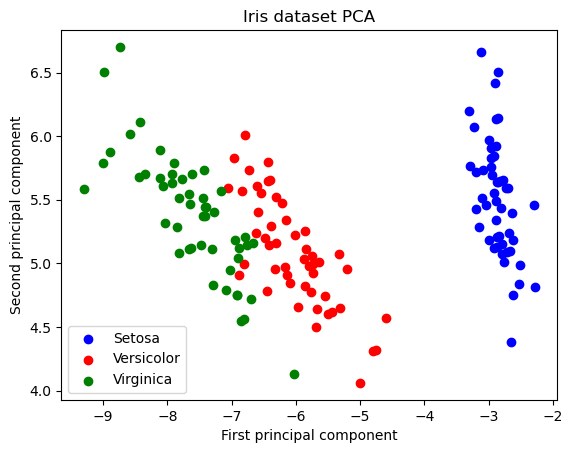

In [8]:
# Plot the first two principal components

plt.figure()
plt.scatter(DP[0, L == 0], DP[1, L == 0], c="blue", label="Setosa")
plt.scatter(DP[0, L == 1], DP[1, L == 1], c="red", label="Versicolor")
plt.scatter(DP[0, L == 2], DP[1, L == 2], c="green", label="Virginica")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.title("Iris dataset PCA")
plt.show()

# LDA


In [9]:
weights = np.array([np.sum(L == c) for c in range(3)])
means = np.array([np.mean(D[:, L == c], axis=1) for c in range(3)]).T

## Between Class Scatter Matrix


In [19]:
SB = np.average(
    [
        np.outer(means[:, c] - mu, means[:, c] - mu)
        for c in range(3)
    ],
    axis=0,
    weights=[np.sum(L == c) for c in range(3)],
)

print(f"Between-class scatter matrix:\n{SB}")

Between-class scatter matrix:
[[ 0.42141422 -0.13301778  1.101656    0.47519556]
 [-0.13301778  0.07563289 -0.38159733 -0.15288444]
 [ 1.101656   -0.38159733  2.91401867  1.24516   ]
 [ 0.47519556 -0.15288444  1.24516     0.53608889]]


In [29]:
SB = np.average(
    [
        mumu := (means[:, c] - mu)[:, np.newaxis] * (means[:, c] - mu)[np.newaxis, :]
        for c in range(3)
    ],
    axis=0,
    weights=weights,
)

print(f"Between-class scatter matrix:\n{SB}")

Between-class scatter matrix:
[[ 0.42141422 -0.13301778  1.101656    0.47519556]
 [-0.13301778  0.07563289 -0.38159733 -0.15288444]
 [ 1.101656   -0.38159733  2.91401867  1.24516   ]
 [ 0.47519556 -0.15288444  1.24516     0.53608889]]


## Within Class Scatter Matrix


In [11]:
SW = np.average(
    [
        np.cov(D[:, L == c], bias=True)
        for c in range(3)
    ],
    axis=0,
    weights=[np.sum(L == c) for c in range(3)],
)

print(f"Within-class scatter matrix:\n{SW}")

Within-class scatter matrix:
[[0.259708   0.09086667 0.164164   0.03763333]
 [0.09086667 0.11308    0.05413867 0.032056  ]
 [0.164164   0.05413867 0.181484   0.041812  ]
 [0.03763333 0.032056   0.041812   0.041044  ]]


## Generalized Eigenvalue Problem


In [12]:
s, U = linalg.eigh(SB, SW)
W = U[:, ::-1][:, :2]

print(f"LDA matrix:\n{W}")

LDA matrix:
[[ 0.83779794  0.02434685]
 [ 1.55005187  2.18649663]
 [-2.22355955 -0.94138258]
 [-2.83899363  2.86801283]]


### SVD to find a basis

The columns of W are not necessarily orthogonal. We can find a basis U for the subspace spanned by W using the singular value decomposition of W.


In [13]:
UW, *_ = np.linalg.svd(W)
U = UW[:, :2]

print(f"Basis matrix:\n{U}")

assert np.allclose(W, IRIS_LDA_matrix_m2)

Basis matrix:
[[-0.16188578 -0.13894884]
 [-0.01900807 -0.76893743]
 [ 0.31480747  0.57834653]
 [ 0.93505505 -0.23440081]]


## Plot the first two LDA components


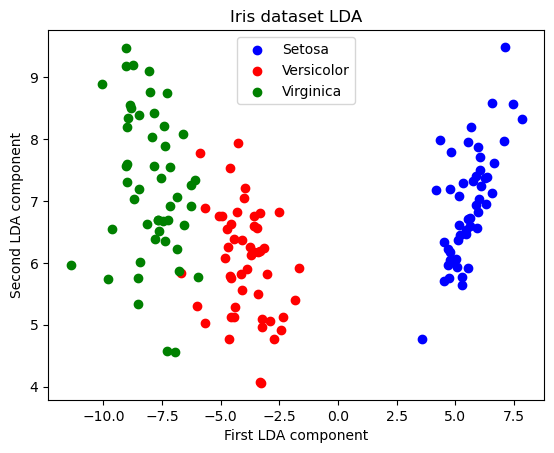

In [14]:
# Project the data
DP_LDA = np.dot(D.T, W)

plt.figure()
plt.scatter(DP_LDA[L == 0, 0], DP_LDA[L == 0, 1], c="blue", label="Setosa")
plt.scatter(DP_LDA[L == 1, 0], DP_LDA[L == 1, 1], c="red", label="Versicolor")
plt.scatter(DP_LDA[L == 2, 0], DP_LDA[L == 2, 1], c="green", label="Virginica")
plt.xlabel("First LDA component")
plt.ylabel("Second LDA component")
plt.legend()
plt.title("Iris dataset LDA")
plt.show()

## Compare with PCA


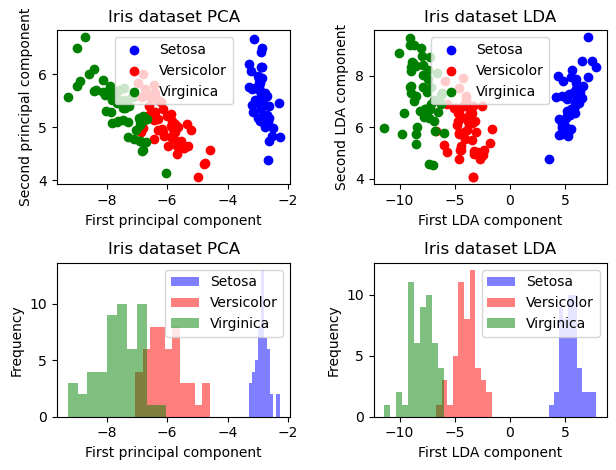

In [15]:
plt.subplot(2,2,1)
plt.scatter(DP[0, L == 0], DP[1, L == 0], c="blue", label="Setosa")
plt.scatter(DP[0, L == 1], DP[1, L == 1], c="red", label="Versicolor")
plt.scatter(DP[0, L == 2], DP[1, L == 2], c="green", label="Virginica")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.title("Iris dataset PCA")

plt.subplot(2,2,2)
plt.scatter(DP_LDA[L == 0, 0], DP_LDA[L == 0, 1], c="blue", label="Setosa")
plt.scatter(DP_LDA[L == 1, 0], DP_LDA[L == 1, 1], c="red", label="Versicolor")
plt.scatter(DP_LDA[L == 2, 0], DP_LDA[L == 2, 1], c="green", label="Virginica")
plt.xlabel("First LDA component")
plt.ylabel("Second LDA component")
plt.legend()
plt.title("Iris dataset LDA")

plt.subplot(2,2,3)
plt.hist(DP[0, L == 0], bins=10, alpha=0.5, color="blue", label="Setosa")
plt.hist(DP[0, L == 1], bins=10, alpha=0.5, color="red", label="Versicolor")
plt.hist(DP[0, L == 2], bins=10, alpha=0.5, color="green", label="Virginica")
plt.xlabel("First principal component")
plt.ylabel("Frequency")
plt.legend()
plt.title("Iris dataset PCA")

plt.subplot(2,2,4)
plt.hist(DP_LDA[L == 0, 0], bins=10, alpha=0.5, color="blue", label="Setosa")
plt.hist(DP_LDA[L == 1, 0], bins=10, alpha=0.5, color="red", label="Versicolor")
plt.hist(DP_LDA[L == 2, 0], bins=10, alpha=0.5, color="green", label="Virginica")
plt.xlabel("First LDA component")
plt.ylabel("Frequency")
plt.legend()
plt.title("Iris dataset LDA")

plt.tight_layout()
plt.show()
